#Hate Speech Project

##Importing appropriate libraries

In [1]:
!pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, TFBertModel, TFBertForSequenceClassification

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Read the dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Hate_of_speech.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


##Visulize the dataset

In [6]:
class_conuts = df['class'].value_counts()
class_conuts

1    19190
2     4163
0     1430
Name: class, dtype: int64

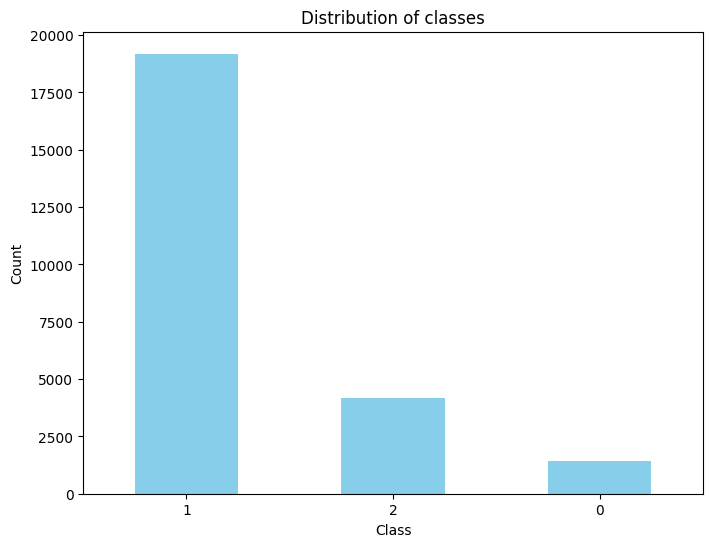

In [7]:
plt.figure(figsize=(8,6))
class_conuts.plot(kind='bar', color='skyblue')
plt.title('Distribution of classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##Preprocessing the data

In [8]:
df.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

###Normalizing the distribution

In [9]:
X = df.drop(['class'],axis=1)
y = df['class']

In [10]:
oversampler = RandomOverSampler(random_state=42)

In [11]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [12]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='class')], axis=1)

In [13]:
class_counts_resampled = df_resampled['class'].value_counts()
class_counts_resampled

2    19190
1    19190
0    19190
Name: class, dtype: int64

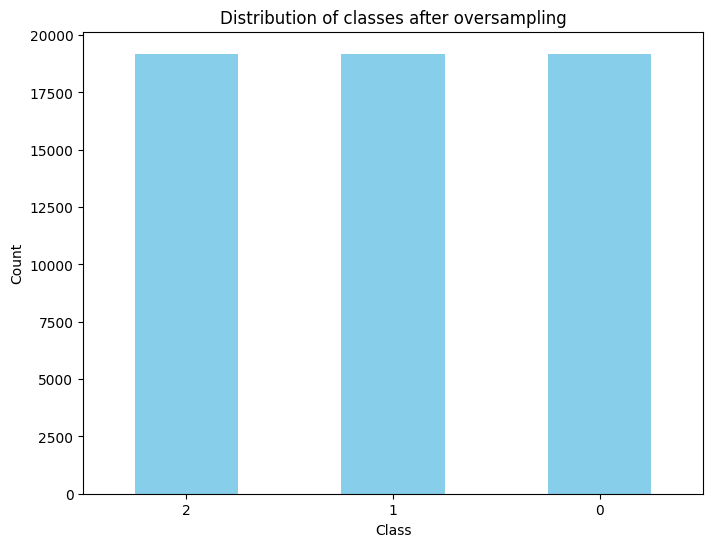

In [14]:
plt.figure(figsize=(8, 6))
class_counts_resampled.plot(kind='bar', color='skyblue')
plt.title('Distribution of classes after oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##Creating Support Vector Machine (SVM) model

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X_text = df_resampled['tweet']
X_vectorized = vectorizer.fit_transform(X_text)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.2, random_state=42)

In [17]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
y_pred = svm_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3849
           1       0.95      0.87      0.91      3794
           2       0.96      0.98      0.97      3871

    accuracy                           0.94     11514
   macro avg       0.94      0.94      0.94     11514
weighted avg       0.94      0.94      0.94     11514



## Creating Decision Tree model

In [20]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred_dt = dt_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3849
           1       1.00      0.89      0.94      3794
           2       0.97      1.00      0.98      3871

    accuracy                           0.96     11514
   macro avg       0.97      0.96      0.96     11514
weighted avg       0.97      0.96      0.96     11514



## Creating Naive Bayes model

In [23]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred_nb = nb_model.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      3849
           1       0.79      0.86      0.83      3794
           2       0.92      0.89      0.91      3871

    accuracy                           0.86     11514
   macro avg       0.87      0.86      0.86     11514
weighted avg       0.87      0.86      0.86     11514

